In [1]:
import pandas as pd

train = pd.read_csv("ed-titanic-training.csv", index_col=0)
test = pd.read_csv("ed-titanic-test.csv", index_col=0)

train.loc[train['Age'] > 3, 'Age'] = 4
test.loc[test['Age'] > 3, 'Age'] = 4

train.head(100)


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,1,2,0,1,0,0,1,1,1
96,0,1,1,4,0,3,1,1,1,1,1
97,1,1,1,1,1,3,1,1,2,0,1
98,1,2,0,2,1,2,0,0,2,0,3


<Axes: title={'center': 'Pearson Correlation of Features'}>

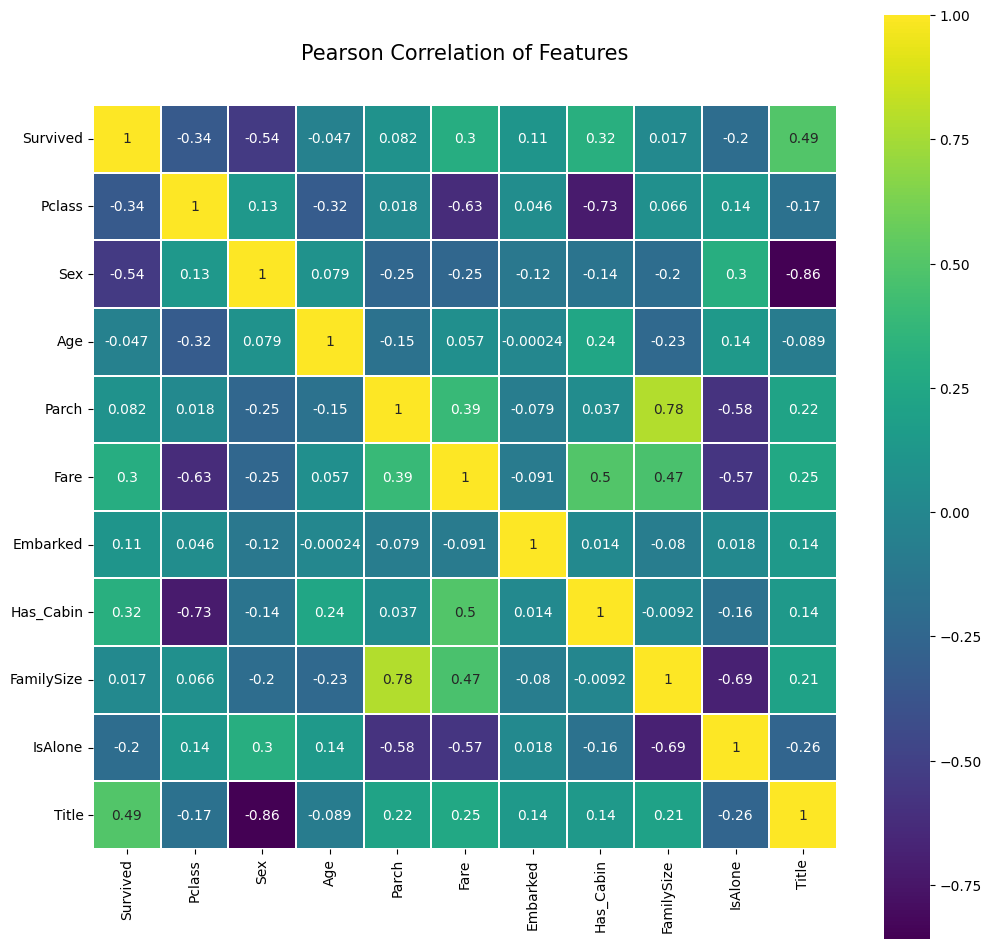

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor="white", annot=True)

TODO: Opisz największe wartości w pierwszej kolumnie - korelacja z przeżyciem
TODO: Opisz największe wartości generalnie w tabeli - korelacja pomiędzy dwoma kolumnami

In [3]:
titles = {
    1: 'Mr',
    2: 'Master',
    3: 'Mrs',
    4: 'Miss',
    5: 'Rare'
}

grouping = train.groupby(by=['Title'])['Survived'].mean()
grouping.index = titles.values()
grouping

Mr        0.156673
Master    0.575000
Mrs       0.793651
Miss      0.702703
Rare      0.347826
Name: Survived, dtype: float64

Widzimy, że najczęście przeżywały kobiety, następnie arystokracja, osoby o rzadkich tytułach już rzadziej, a panowie w bardzo małym odsetku.

In [4]:
data_x = train.drop('Survived', axis=1)
data_y = train['Survived']

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np

search = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini'],
        'max_depth': np.arange(1, 15)
    },
    cv=10,
    scoring='accuracy'
)

search.fit(data_x, data_y)
print(search.best_estimator_.max_depth)

3


In [6]:
search = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['entropy'],
        'max_depth': np.arange(1, 15)
    },
    cv=10,
    scoring='accuracy'
)

search.fit(data_x, data_y)
print(search.best_estimator_.max_depth)

3


In [7]:
# 6
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=1)
decision_tree.fit(data_x, data_y)

pred_data_y = decision_tree.predict(data_x)
accuracy_score(pred_data_y, data_y)

0.8316498316498316

In [8]:
# 6
f = open("pred_data_survivers.txt", "w")
f.write(str(pred_data_y))
f.flush()
f.close()

pred_data_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

[Text(0.5, 0.875, 'Title <= 1.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.25, 0.625, 'Has_Cabin <= 0.5\nentropy = 0.626\nsamples = 517\nvalue = [436, 81]\nclass = Died'),
 Text(0.125, 0.375, 'FamilySize <= 3.5\nentropy = 0.502\nsamples = 424\nvalue = [377, 47]\nclass = Died'),
 Text(0.0625, 0.125, 'entropy = 0.514\nsamples = 410\nvalue = [363, 47]\nclass = Died'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Died'),
 Text(0.375, 0.375, 'Fare <= 0.5\nentropy = 0.947\nsamples = 93\nvalue = [59, 34]\nclass = Died'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Died'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 85\nvalue = [51, 34]\nclass = Died'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.884\nsamples = 374\nvalue = [113, 261]\nclass = Survived'),
 Text(0.625, 0.375, 'Title <= 4.5\nentropy = 0.526\nsamples = 202\nvalue = [24, 178]\nclass = Survived'),
 Text(0.5625, 0.125, 'entropy = 0

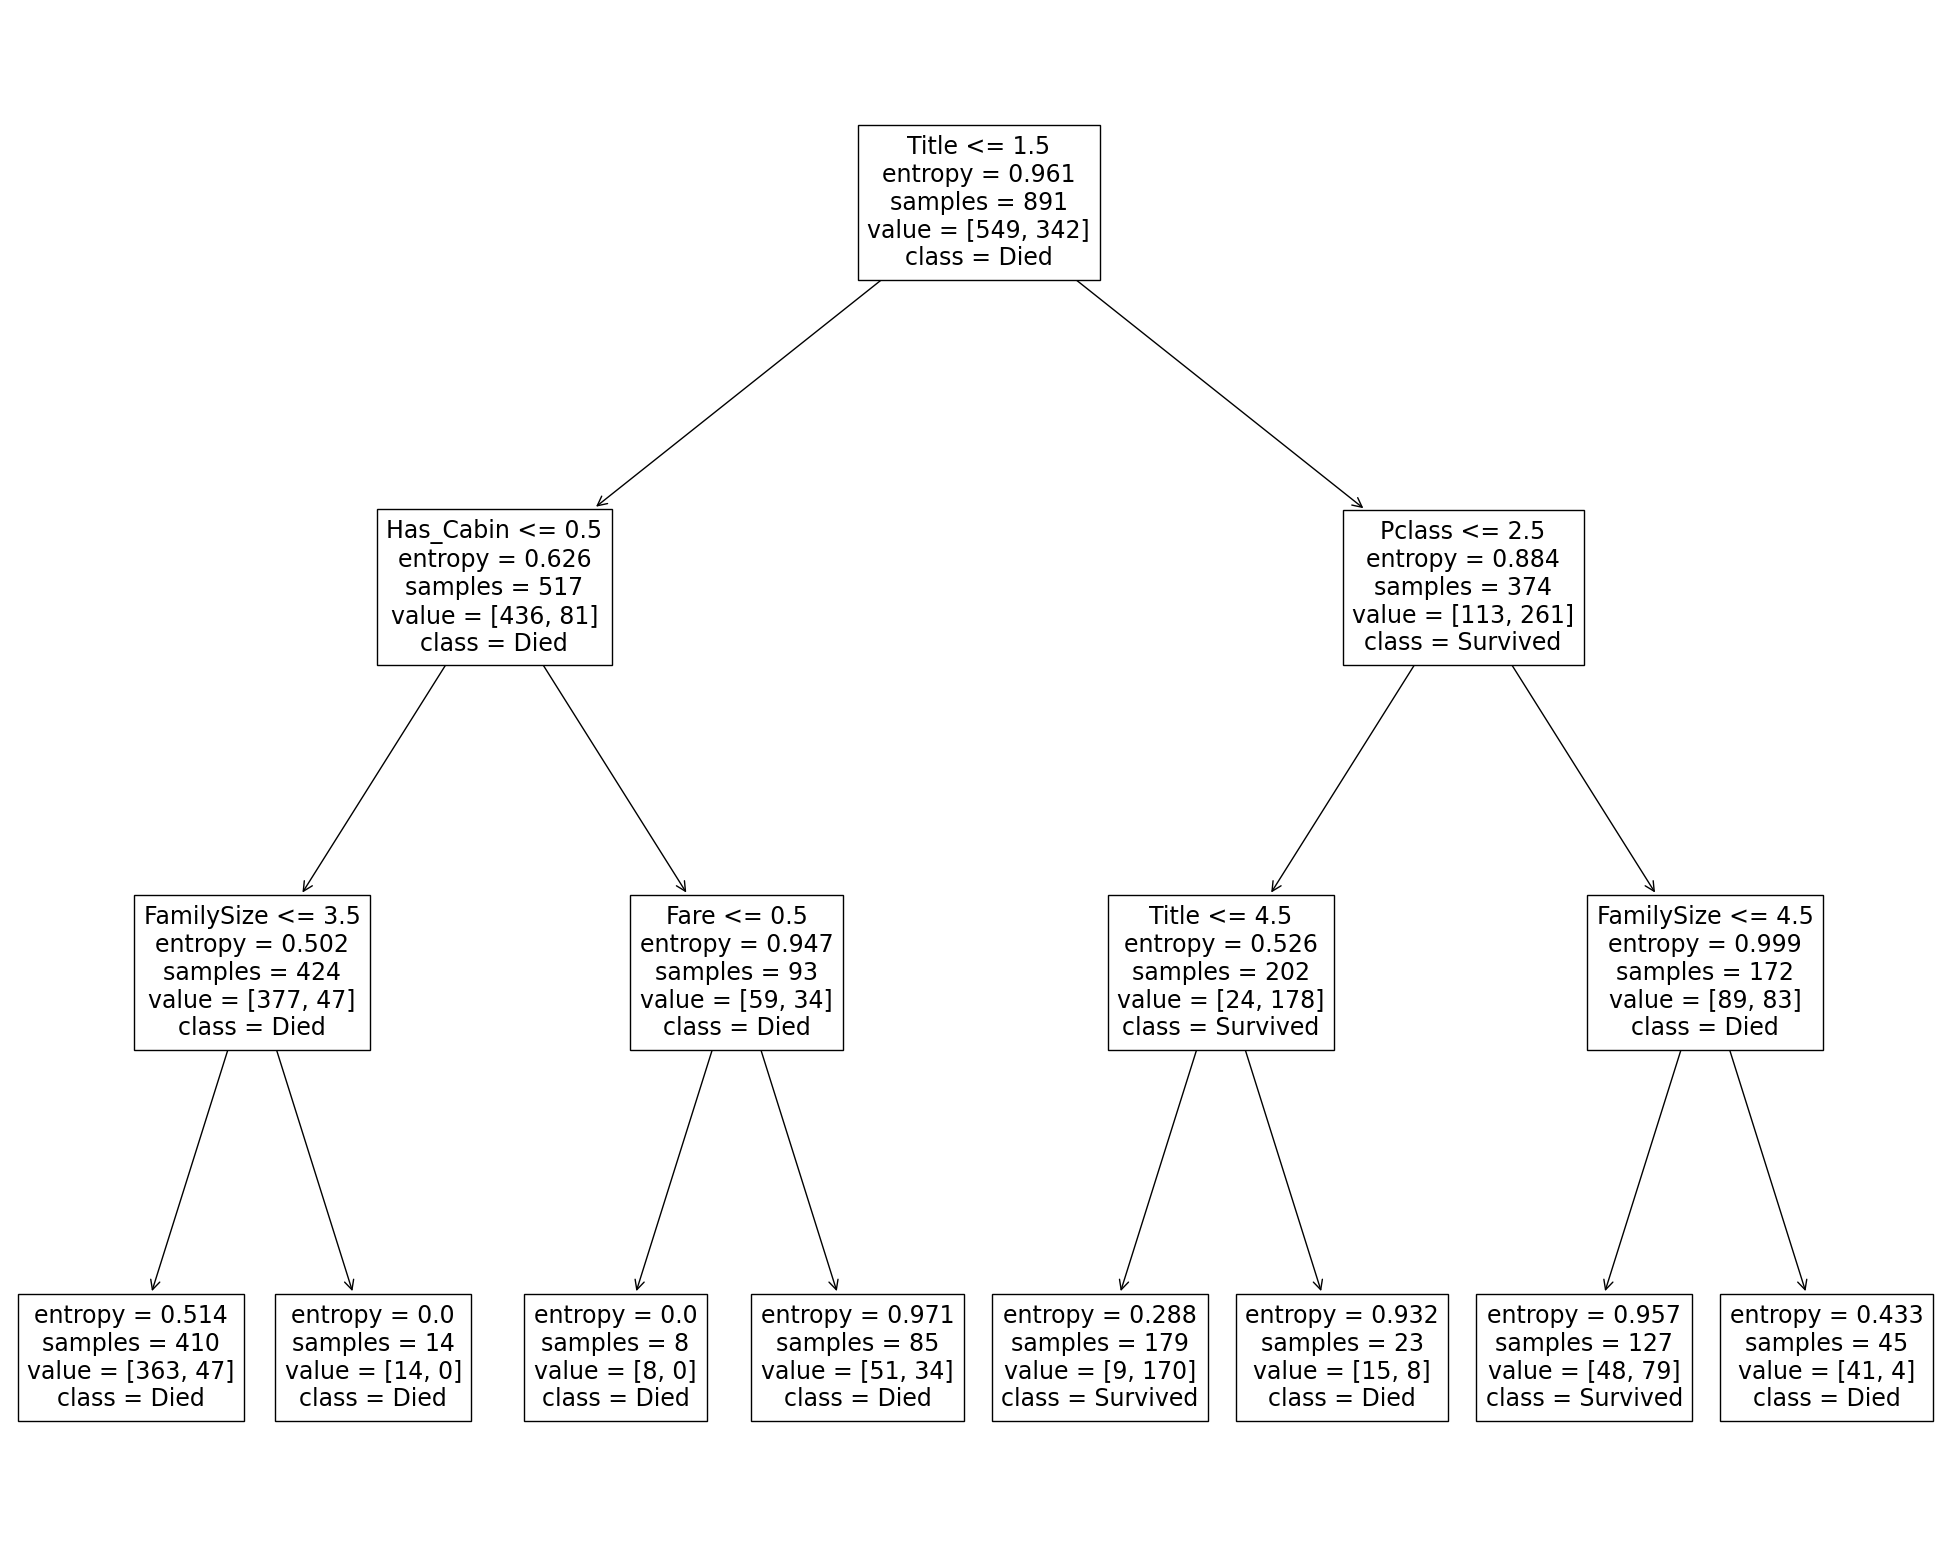

In [9]:
# 7
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree=decision_tree, feature_names=data_x.columns, class_names=['Died', 'Survived'])

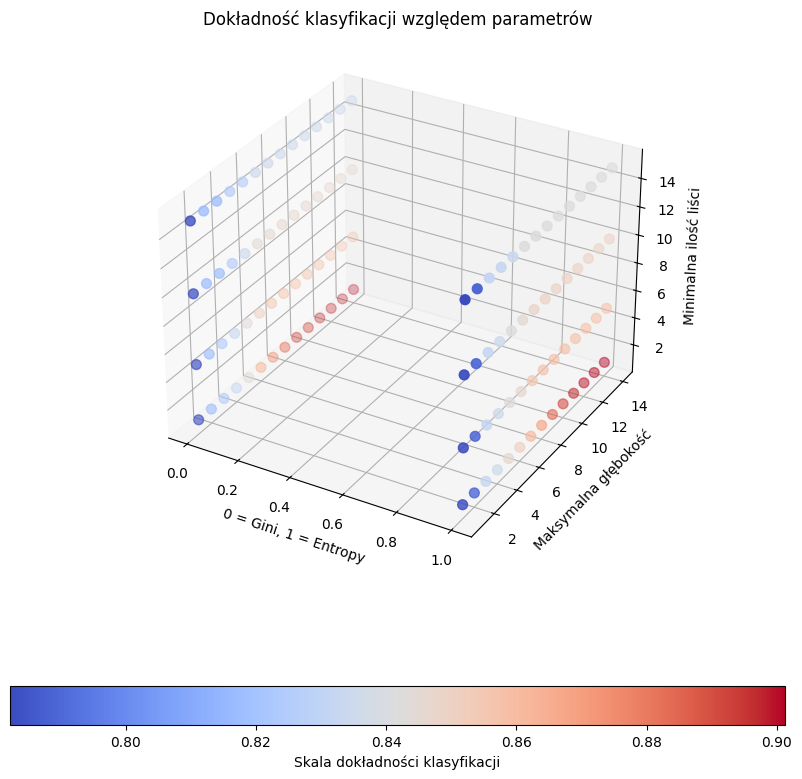

In [20]:
# 8
accuracies = []
params = []

for criterion in [0, 1]:
    for max_depth in np.arange(1, 15):
        for min_samples_leaf in [1, 5, 10, 15]:
            criterion_label = 'gini' if criterion == 0 else 'entropy'

            model = DecisionTreeClassifier(criterion=criterion_label, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            model.fit(data_x, data_y)
            
            y_pred = model.predict(data_x)
            accuracy = accuracy_score(data_y, y_pred)            
            accuracies.append(accuracy)
            params.append((criterion, max_depth, min_samples_leaf))

accuracies = np.array(accuracies)
params = np.array(params)

fig = plt.figure(figsize=(10, 12))
points = fig.add_subplot(111, projection='3d')

points.scatter(params[:, 0], params[:, 1], params[:, 2], c=accuracies, cmap='coolwarm', s=50)
points.set_xlabel('0 = Gini, 1 = Entropy')
points.set_ylabel('Maksymalna głębokość')
points.set_zlabel('Minimalna ilość liści')
points.set_title('Dokładność klasyfikacji względem parametrów')

cbar = plt.colorbar(points.collections[0], ax=points, orientation='horizontal')
cbar.set_label('Skala dokładności klasyfikacji')

plt.show()

In [24]:
# 9
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.75)

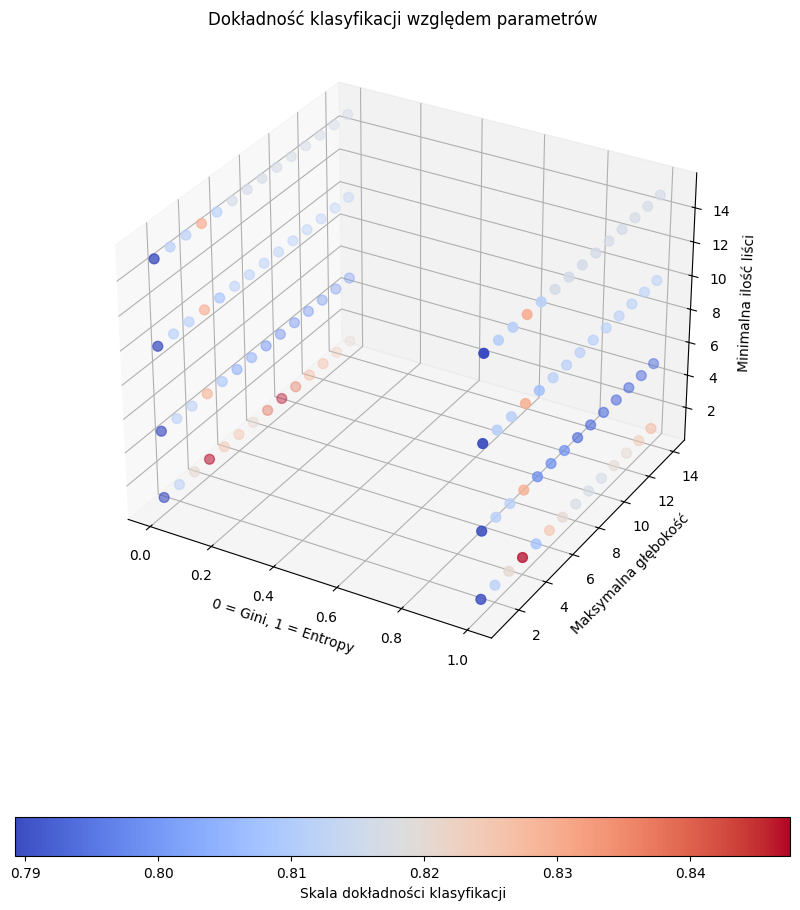

In [23]:
# 8 ponownie dla nowego zestawu danych
# 8
accuracies = []
params = []

for criterion in [0, 1]:
    for max_depth in np.arange(1, 15):
        for min_samples_leaf in [1, 5, 10, 15]:
            criterion_label = 'gini' if criterion == 0 else 'entropy'

            model = DecisionTreeClassifier(criterion=criterion_label, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=7)
            model.fit(x_train, y_train)
            
            y_pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)            
            accuracies.append(accuracy)
            params.append((criterion, max_depth, min_samples_leaf))

accuracies = np.array(accuracies)
params = np.array(params)

fig = plt.figure(figsize=(10, 12))
points = fig.add_subplot(111, projection='3d')

points.scatter(params[:, 0], params[:, 1], params[:, 2], c=accuracies, cmap='coolwarm', s=50)
points.set_xlabel('0 = Gini, 1 = Entropy')
points.set_ylabel('Maksymalna głębokość')
points.set_zlabel('Minimalna ilość liści')
points.set_title('Dokładność klasyfikacji względem parametrów')

cbar = plt.colorbar(points.collections[0], ax=points, orientation='horizontal')
cbar.set_label('Skala dokładności klasyfikacji')

plt.show()

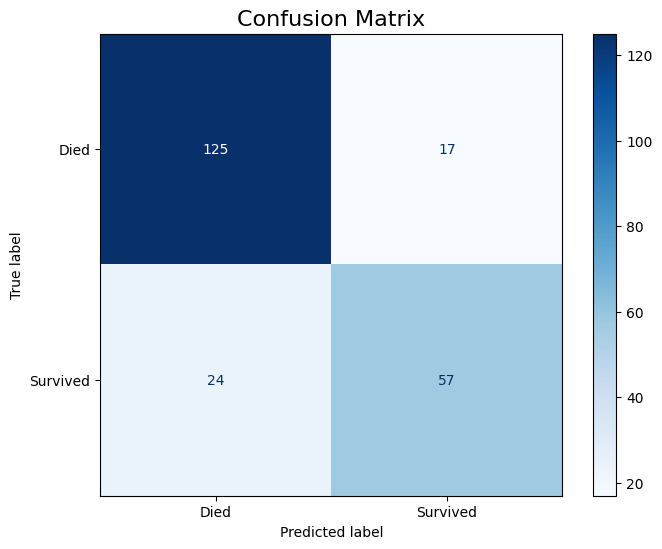

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix', fontsize=16)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(y_test, y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')


Accuracy: 0.816
F1-score: 0.735
Avg Precision: 0.814
Avg Recall: 0.816


Najczesie przezywali
- mężatki z dziećmi
- arystokracja

buckety na wiek

w kategorii 


parch - binarny parent/children, lub nie

porównanie gini i entropii w 3D max_dep


klasyfikatory złożone zostały zastąpione przez sieci głębokie - poczytaj sobie

Predykcje zapisz jako plik tekstowy